## Import necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_multi_img (rows,columns,img_names,titles = None,vmin = 0,vmax = 255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(img_names[i],cmap='gray',vmin=vmin,vmax=vmax)
        plt.axis('off')
        if titles is not None:
            plt.title(str(i+1) + '. ' + titles[i])
    plt.show()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

<div style="border-radius:10px; padding: 15px; background-color: #FF6347; font-size:110%; text-align:left;color:black">
    
1. Split the 8th frame of the video (lane.mp4) and Denoise that, then find the edges, and finally show the edges on the original frame!
(denoising and edge detection method are desired!)

In [4]:
#read Video file
capture = cv2.VideoCapture(r'media/lane.mp4')

In [5]:
frame_number = 8

In [6]:
while frame_number >0:
    success,frame = capture.read()
    if not success:
        break
    frame_number -=1

In [7]:
frame.shape

(720, 1280, 3)

In [ ]:
# frame = capture.set(cv2.CAP_PROP_POS_FRAMES,frame_number)

In [8]:
frame_8_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frame_8_rgb_copy = frame_8_rgb.copy()

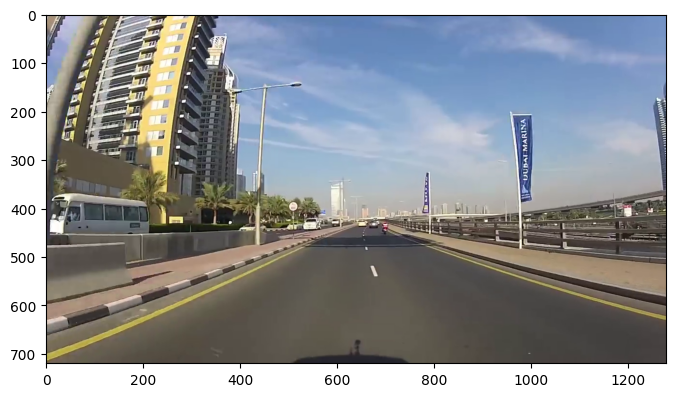

In [9]:
show_img_plt(frame_8_rgb_copy)

In [10]:
#denosing
denoise_frame = cv2.GaussianBlur(frame_8_rgb_copy,(5,5),0)

In [11]:
#Edge detection
edge_denoise_frame = cv2.Canny(denoise_frame,100,200)

In [12]:
result = cv2.bitwise_and(frame_8_rgb_copy,frame_8_rgb_copy,mask = edge_denoise_frame)

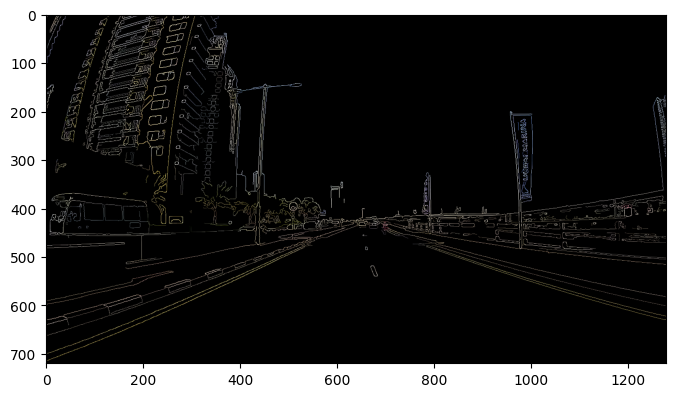

In [13]:
show_img_plt(result)

In [14]:
outPut = np.copy(frame_8_rgb_copy)

In [15]:
outPut[edge_denoise_frame !=0] = [0,255,0]

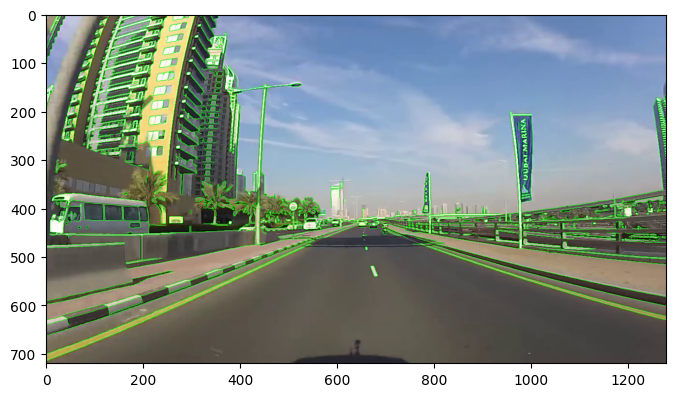

In [16]:
show_img_plt(outPut)

<div style="border-radius:10px; padding: 15px; background-color: #FF6347; font-size:110%; text-align:left;color:black">
    
2. By yourself, Take a color photo of an object and then place that object in another environment. Then resize and turn it around and retake a picture of it.
Now extract and match the keypoints of these two photos twice. Once when the image is in color and once when the image is Gray level. Which one works better? Why?

In [17]:
def resize_img(img,scale_precent):
    hight = int(img.shape[0]*scale_precent/100)
    width = int(img.shape[1]*scale_precent/100)
    dim = (width,hight)

    resized = cv2.resize(img,dim)
    return resized

In [18]:
#Read Image
img1 = cv2.imread(r'img1.jpg')
img2 = cv2.imread(r'img2.jpg')

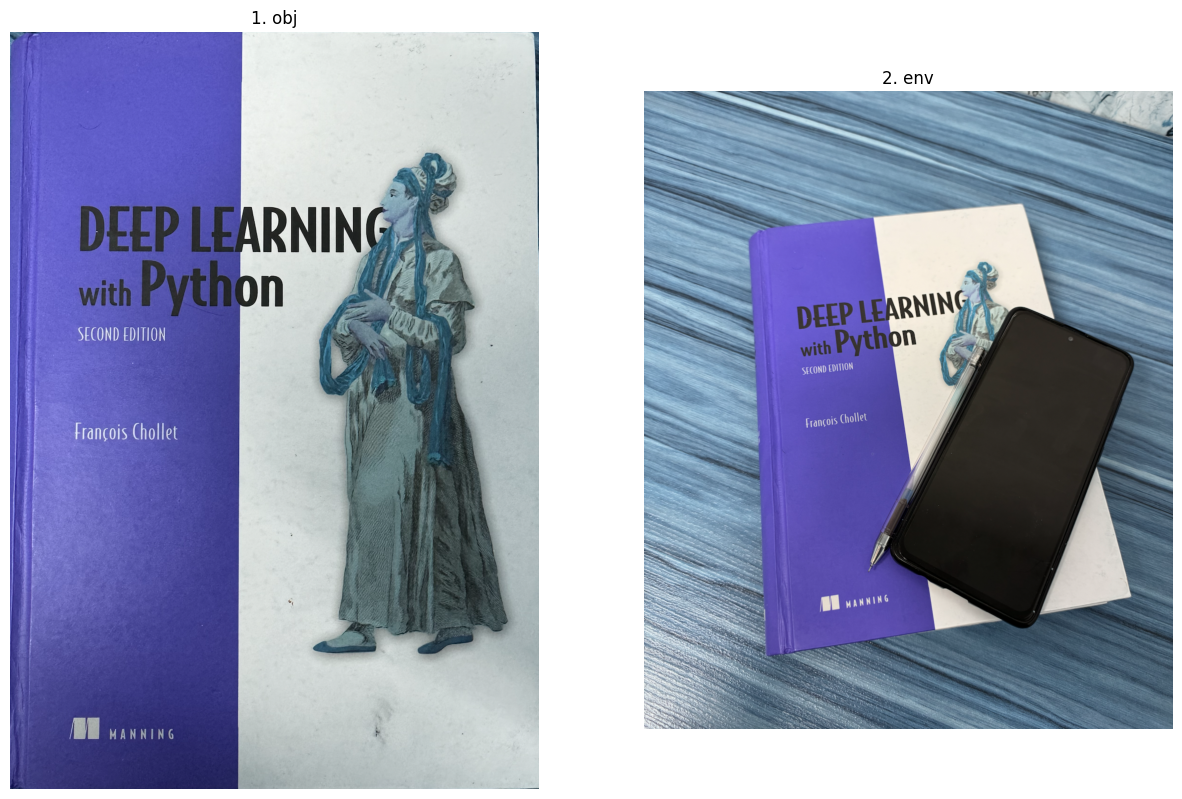

In [19]:
show_multi_img(1,2,[img1 , img2],['obj' , 'env'])

In [20]:
#color Conversion
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

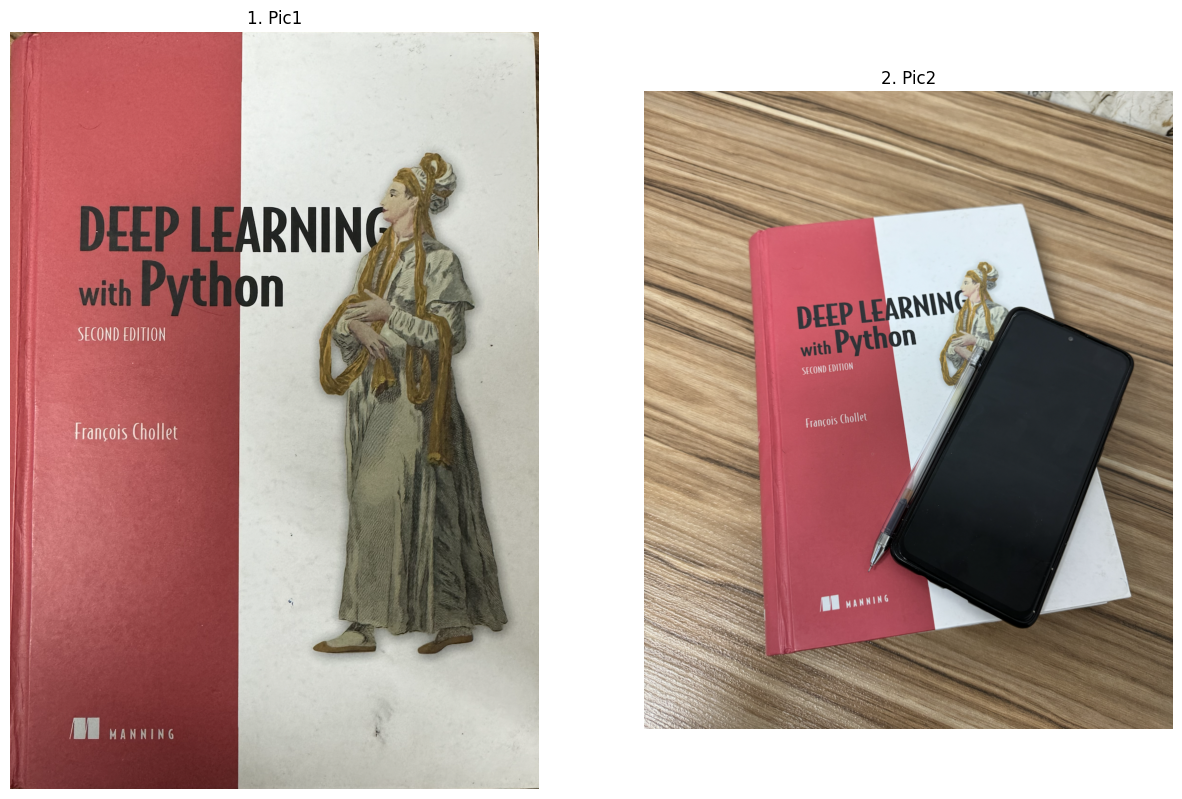

In [21]:
show_multi_img(1,2,(img1_rgb,img2_rgb),titles=['Pic1','Pic2'])

In [22]:
img1_resized = resize_img(img1_rgb,60)
img2_resized = resize_img(img2_rgb,60)

## SIFT

In [23]:
sift = cv2.SIFT_create()

# x,y -->keypoints  Discriptor -->Histogram

keypoints_1,descriptors_1 = sift.detectAndCompute(img1_resized,mask=None)
keypoints_2,descriptors_2 = sift.detectAndCompute(img2_resized,mask=None)

img1_dkp = cv2.drawKeypoints(img1_resized,keypoints_1,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_dkp = cv2.drawKeypoints(img2_resized,keypoints_2,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [24]:
bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck =True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches,key=lambda x:x.distance)

In [25]:
result = cv2.drawMatches(img1_resized,keypoints_1,img2_resized,keypoints_2,matches[:50],None)

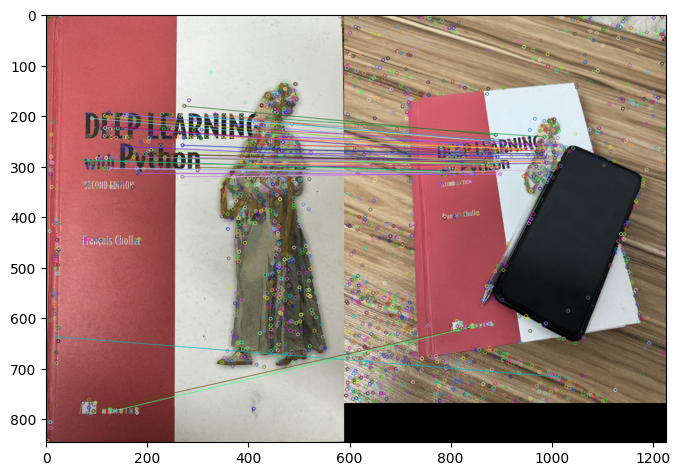

In [26]:
show_img_plt(result)

In [27]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [28]:
img1_resized_gray = resize_img(img1_gray,60)
img2_resized_gray = resize_img(img2_gray,60)

In [29]:
sift = cv2.SIFT_create()

# x,y -->keypoints  Discriptor -->Histogram
            
keypoints_1,descriptors_1 = sift.detectAndCompute(img1_resized_gray,mask=None)
keypoints_2,descriptors_2 = sift.detectAndCompute(img2_resized_gray,mask=None)

img1_dkp_gray = cv2.drawKeypoints(img1_resized_gray,keypoints_1,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_dkp_gray = cv2.drawKeypoints(img2_resized_gray,keypoints_2,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [30]:

bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck =True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches,key=lambda x:x.distance)

In [31]:
result_gray = cv2.drawMatches(img1_resized_gray,keypoints_1,img2_resized_gray,keypoints_2,matches[:50],None)

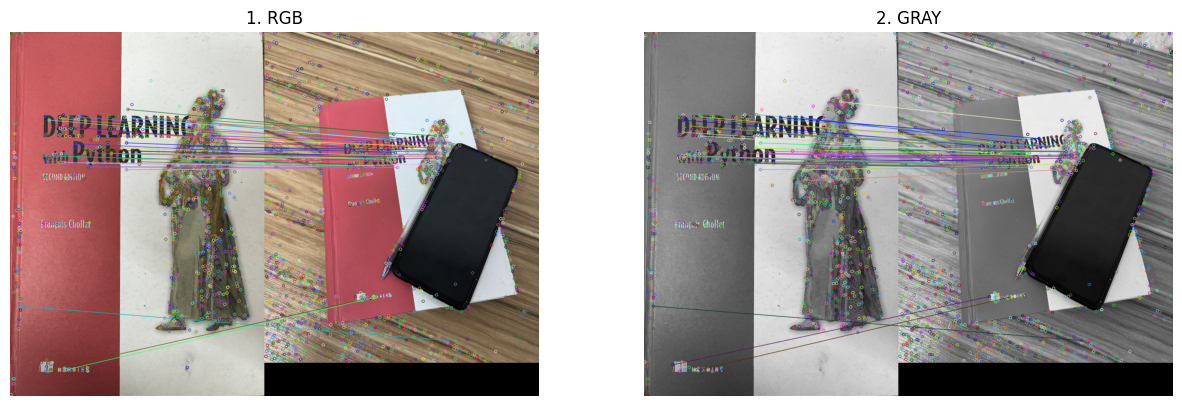

In [32]:
show_multi_img(1,2,(result,result_gray),titles=['RGB','GRAY'])